# IPL HYPOTHESIS TESTING

### Objective Of The Analysis

This project presents a thorough data exploration and statistical analysis of IPL (Indian Premier League) match data. It focuses on uncovering insights, testing relevant hypotheses, and providing actionable interpretations through data visualization and statistical significance testing.




**Benefit to Stakeholders:**<br>
 - Teams can use this analysis for strategy planning
 - Cricket fans can get more insights about the about the game

### Importing Necessary Libraries

In [1]:
!pip install --upgrade -q category_encoders


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
import category_encoders as ce  
from scipy import stats
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv("matches.csv")

### Data Summary:

In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


there are 636 rows and 18 columns

In [6]:
df.shape

(636, 18)

**column informations:**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

Winner column is a possible target variable

If there are less than 636 non null rows in a column, then the rest are null values

### Analysing Missing Values

In [8]:
df.isna().sum().sort_values(ascending = False)

umpire3            636
city                 7
winner               3
player_of_match      3
umpire2              1
umpire1              1
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

umpire3 column completely is empty so we can remove it.

In [9]:
df.drop(columns = "umpire3", inplace = True)

In [10]:
df[df["city"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


all the matches with missing city, happened in dubai international stadium, so city = dubai

In [11]:
df["city"] = df["city"].fillna("Dubai")

In [12]:
df[df["player_of_match"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [13]:
df[df["result"] == "no result"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


player_of_match and Winner is NaN because the result type is "no result", it is a legit data,
we can mask it

In [14]:
df["winner"] = df["winner"].fillna("no")
df["player_of_match"] = df["player_of_match"].fillna("no")

In [15]:
df[df["umpire2"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [16]:
df[df["umpire1"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


We can drop the rows with null values in "umpire1" and "umpire2" columns as there is only 1 such row, and dropping 1 row, wont affect the model much

In [17]:
df.drop(index = 4, inplace = True)

In [18]:
df.isna().sum().sort_values(ascending = False)

id                 0
dl_applied         0
umpire1            0
venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
result             0
season             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
umpire2            0
dtype: int64

All missing values are handled successfully

### Analysing duplicates

In [19]:
df.duplicated().sum()

0

There are no duplicate values

### Handling Outliers

In [20]:
numeric_col = list(df.select_dtypes(include = ["int64","float64"]).columns)
numeric_col.remove("id")
numeric_col.remove("dl_applied")
numeric_col

['season', 'win_by_runs', 'win_by_wickets']

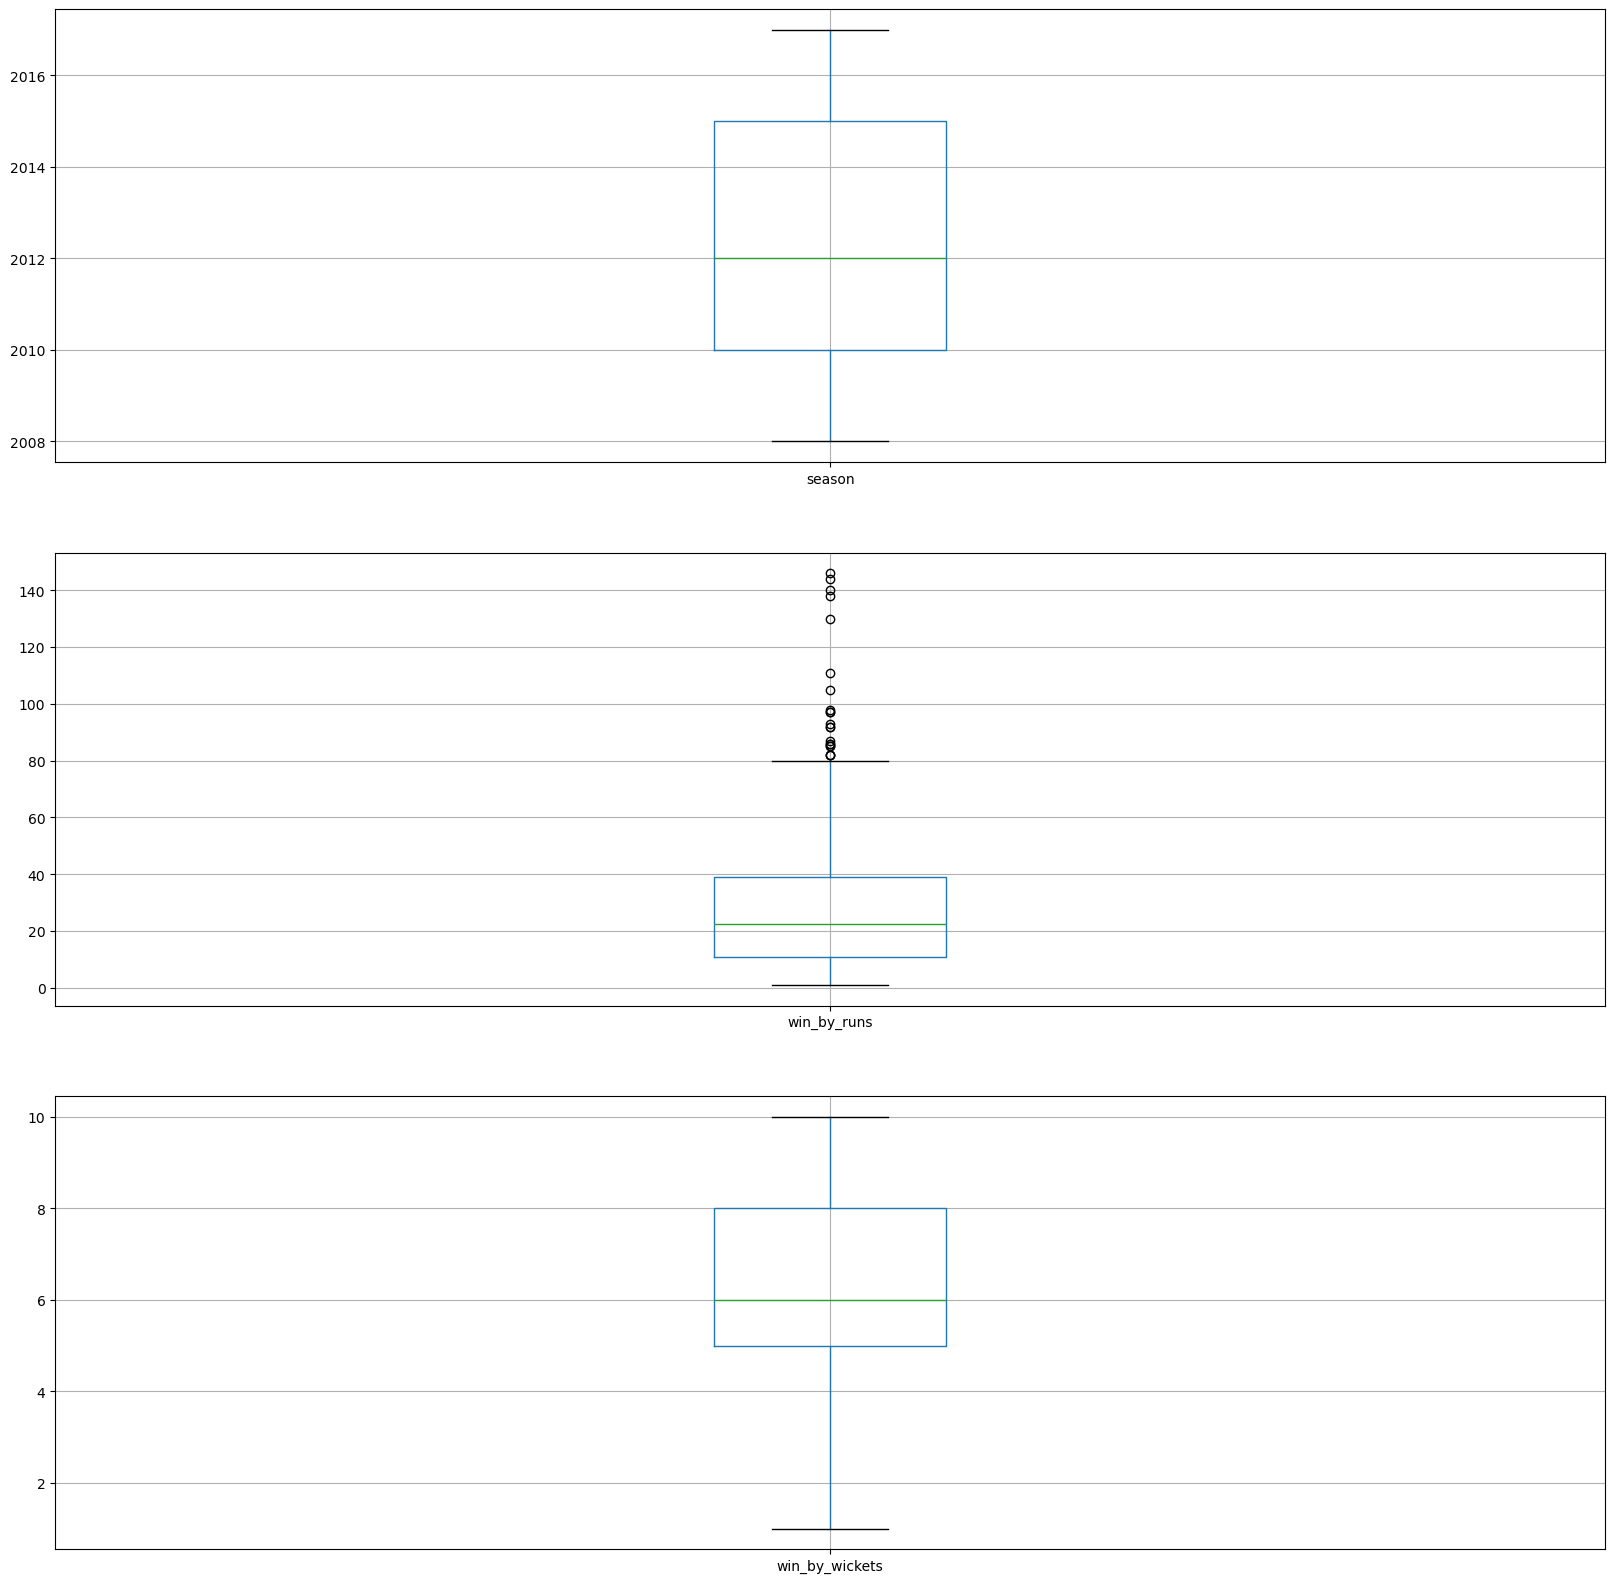

In [21]:
fig = plt.figure(figsize = (20,20))
i = 1
for column in numeric_col:
    plt.subplot(len(numeric_col),1,i)
    i += 1
    df[df[column]>0][[column]].boxplot()

plt.show()


win_by_wickets and win_by_runs needed to be handled properly because, there are lot of zeroes in both which is because only one of the column can have a positive value in an observation, so while calculating outliers the 0 rows should be removed.

In [22]:
# Mean of non-zero values
win_by_runs_p = df[df["win_by_runs"] > 0]["win_by_runs"].mean()

# Set column name
column = "win_by_runs"

# Only consider non-zero values for outlier detection
non_zero_values = df[df[column] > 0][column]

# Calculate IQR
Q1 = non_zero_values.quantile(0.25)
Q3 = non_zero_values.quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - 1.5 * IQR
maxi = Q3 + 1.5 * IQR

# Create a mask for the full df, matching indices of non-zero outliers
outlier_mask = (df[column] > maxi) | ((df[column] < mini) & (df[column] > 0))

# Replace outliers with mean
df.loc[outlier_mask, column] = int(win_by_runs_p)


Outliers are sucessfully handled

### Handling Typos:

In [23]:
df["winner"].unique().tolist()

['Sunrisers Hyderabad',
 'Rising Pune Supergiant',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Pune Warriors',
 'Kochi Tuskers Kerala',
 'no',
 'Rising Pune Supergiants']

We can observe that Rising Pune Supergiants is repeated twice, because of different spellings

In [24]:
df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [25]:
cols = ["team1", "team2", "toss_winner", "winner"]
for col in cols:
    df[col].replace({"Rising Pune Supergiant" : 'Rising Pune Supergiants'},inplace = True)

In [26]:
df["winner"].unique().tolist()

['Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Pune Warriors',
 'Kochi Tuskers Kerala',
 'no']

### Exploratory Data Analysis:

In [27]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


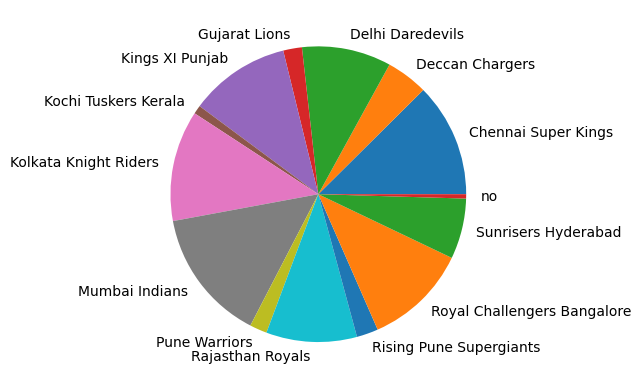

In [28]:
df_teamwise = df[["season","winner"]].groupby("winner").count().reset_index().rename(columns = {"season" : "matches_won"})
ax = plt.axes()
ax.pie(df_teamwise.matches_won, labels = df_teamwise.winner.unique().tolist(), autopct = None)
plt.show()

In [29]:
df_teamwise.winner.count()

14

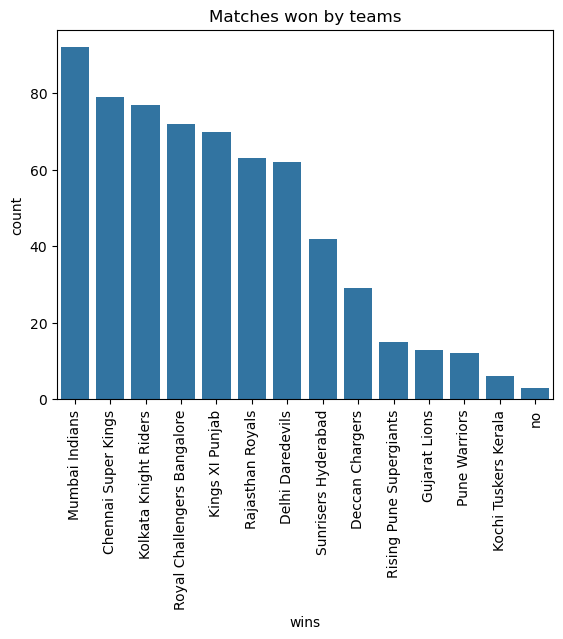

In [30]:
sns.barplot(df["winner"].value_counts(), ci = False)
plt.title("Matches won by teams")
plt.xlabel("wins")
plt.xticks(rotation = 90)
plt.show()

Conclusion: Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Royal Challengers Banglore, Kings XI Punjab, Delhi Daredevils are the main teams and Sun Rising Hyderabad to some extent, other teams havent wont much titles

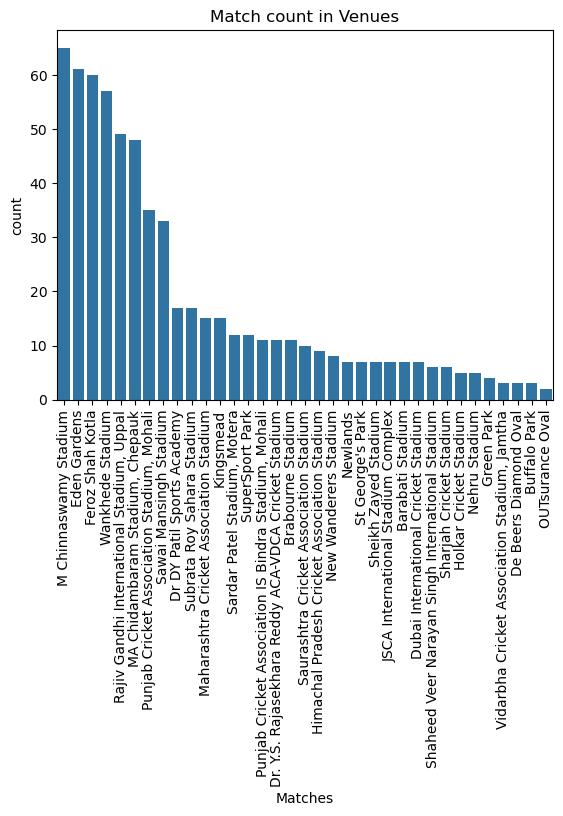

In [31]:
sns.barplot(df["venue"].value_counts(), ci = False)
plt.title("Match count in Venues")
plt.xticks(rotation = 90)
plt.xlabel("Matches")
plt.show()


Conclusions: M Chinnaswamy Stadium, Eden Gardens, Feroz Shah Kotla, Wankhede Stadium, MA Chidambaram stadium, Punjab Cricket Association Stadium, Sawai Mansingh stadium are the most played stadiums, no. of matches played significantly decreases after that

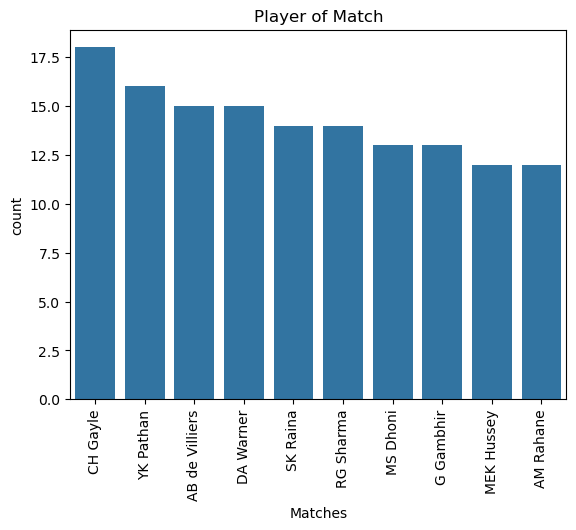

In [32]:
sns.barplot(df["player_of_match"].value_counts().head(10), ci = False)
plt.title("Player of Match")
plt.xticks(rotation = 90)
plt.xlabel("Matches")
plt.show()


## Feature Engineering:

### Encoding:

In [33]:
obj_cols = df.select_dtypes(include = ["object"]).columns
obj_cols

Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [34]:
for col in df.columns[1:]:
    print(len(df[col].unique().tolist()))

10
31
450
13
13
13
2
3
2
14
71
11
202
35
44
45


In [35]:
nominal_low_card = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result']
nominal_high_card = ['venue', 'winner']
ordinal_like = ['player_of_match', 'umpire1', 'umpire2']

encode = ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), nominal_low_card),
    ("freq_high_card", ce.CountEncoder(), nominal_high_card),
    ("freq_ordinal", ce.CountEncoder(), ordinal_like)
], remainder='passthrough')

df_enc = pd.DataFrame(encode.fit_transform(df), columns=encode.get_feature_names_out())


In [36]:
df_enc.head()

,onehot__city_Abu Dhabi,onehot__city_Ahmedabad,onehot__city_Bangalore,onehot__city_Bloemfontein,onehot__city_Cape Town,onehot__city_Centurion,onehot__city_Chandigarh,onehot__city_Chennai,onehot__city_Cuttack,onehot__city_Delhi,...,freq_high_card__winner,freq_ordinal__player_of_match,freq_ordinal__umpire1,freq_ordinal__umpire2,remainder__id,remainder__season,remainder__date,remainder__dl_applied,remainder__win_by_runs,remainder__win_by_wickets
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,5,13,13,1,2017,2017-04-05,0,35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15,4,11,49,2,2017,2017-04-06,0,0,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77,2,11,36,3,2017,2017-04-07,0,0,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,5,43,50,4,2017,2017-04-08,0,0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,2,3,13,6,2017,2017-04-09,0,0,9


## Hypothesis Testing

Hypothesis 1:<br>
H0: CSK's victory is independent of the venue<br>
H1: CSK's probability of winning is higher if it plays in its home ground

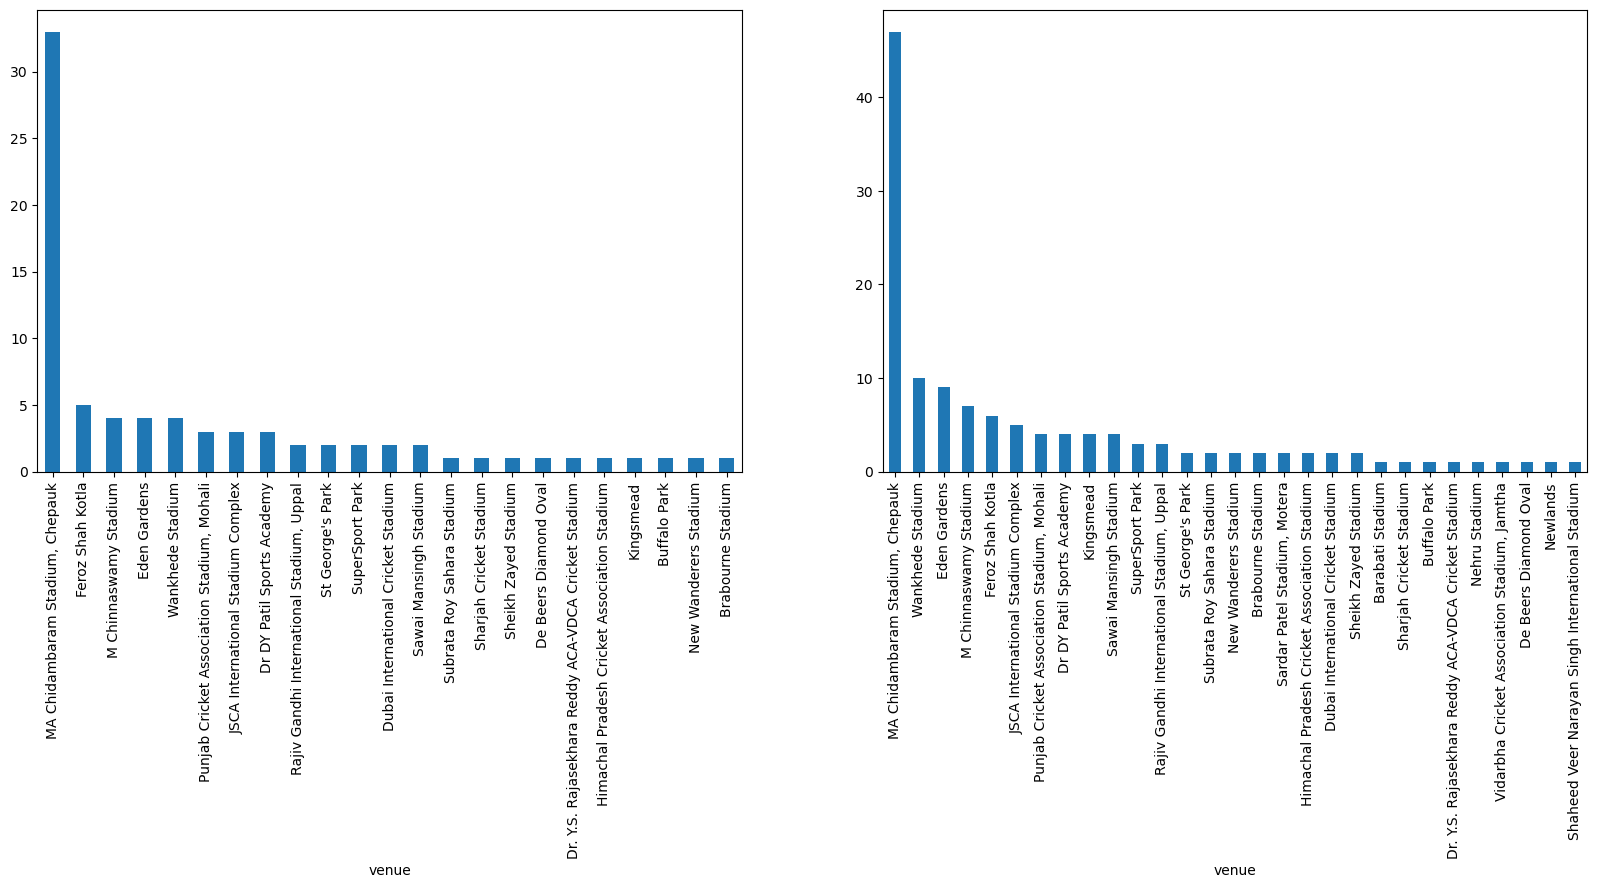

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))
df[df["winner"] == "Chennai Super Kings"]["venue"].value_counts().plot(kind = "bar",ax = ax1)
df[(df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")]["venue"].value_counts().plot(kind = "bar",ax = ax2)
plt.show()

CSK has played most of its matches in MA chidambaram, so the number of wins in that stadium is naturally high, we need to explore further

In [38]:
k1 = df[(df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")]["winner"].value_counts().reset_index(name = "count")
gen_o = k1[k1["winner"] != "Chennai Super Kings"]["count"].sum()
gen_c = k1[k1["winner"] == "Chennai Super Kings"]["count"].sum()
k2 = df[((df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")) & (df["venue"] == "MA Chidambaram Stadium, Chepauk")]["winner"].value_counts().reset_index(name = "count")
chin_o = k2[k2["winner"] != "Chennai Super Kings"]["count"].sum()
chin_c = k2[k2["winner"] == "Chennai Super Kings"]["count"].sum()
print("General probability of winning for csk: ", (gen_c*100)/(gen_c+ gen_o),"\b%")
print("probability of winning for csk in homeground: ", (chin_c*100)/(chin_c+ chin_o),"\b%")

General probability of winning for csk:  60.30534351145038%
probability of winning for csk in homeground:  70.2127659574468%


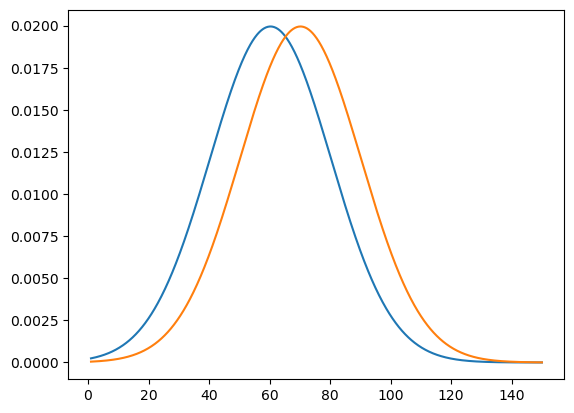

In [39]:
x = np.linspace(1,150,1000)
ax = plt.gca()
y1 = stats.norm.pdf(x,60.30534351145038,20)
y2 = stats.norm.pdf(x,70.2127659574468,20)
ax.plot(x,y1)
ax.plot(x,y2)
plt.show()

this is a one-tail test (right tail test), hence we need to divide the optained two-tailed p-value by 2 to get the one-tailed p-value

In [40]:
from scipy.stats import ttest_ind
alpha = 0.05
t_stat, p_value = ttest_ind(y2,y1)
print(p_value/2)

0.4898340155499039


Since p_value is > 0.05 (our significance level), the null hypothesis is accepted, CSK's victory is not dependent on whether it is playing in homeground or somewhere else

Hypothesis 2:<br>
H0: winning the match is independent of winning the toss <br>
H1: winning the toss increases the probability of winning the match

In [41]:
result_dict = {
    "Match Result": ["winner = toss_winner", "winner != toss_winner"],
    "Count": [
        df[df["winner"] == df["toss_winner"]]["id"].count(),
        df[df["winner"] != df["toss_winner"]]["id"].count()
    ]
}
df_toss_rel = pd.DataFrame(result_dict)


In [42]:
df_toss_rel

,Match Result,Count
0,winner = toss_winner,324
1,winner != toss_winner,311


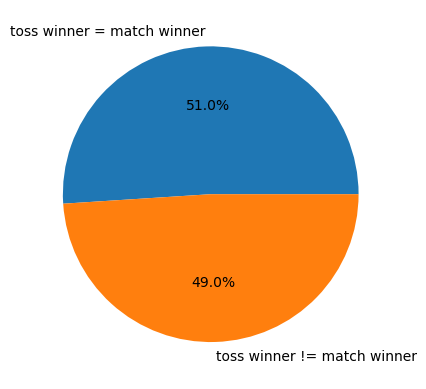

In [43]:
ax = plt.axes()
ax.pie(df_toss_rel.Count,labels = ["toss winner = match winner", "toss winner != match winner"],autopct = "%1.1f%%")
plt.show()

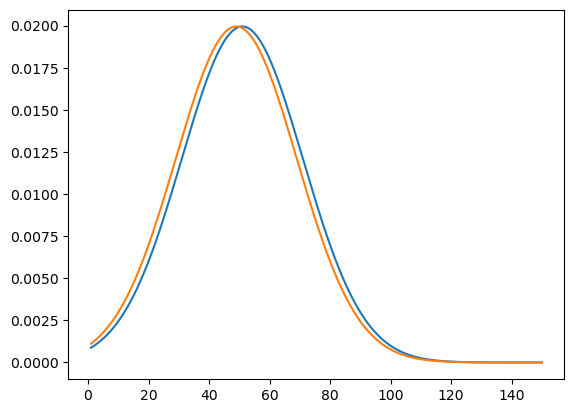

In [44]:
x = np.linspace(1,150,1000)
ax = plt.gca()
y1 = stats.norm.pdf(x,51,20)
y2 = stats.norm.pdf(x,49,20)
ax.plot(x,y1)
ax.plot(x,y2)
plt.show()

In [45]:
alpha = 0.05
t_stat, p_value = ttest_ind(y2,y1)
print(p_value)

0.9667863816129887


Since p_value is > 0.05 (our significance level), the null hypothesis is accepted, winning toss is not going to increase chance of winning the match

Hypothesis 3:<br>
H0: winning is independent of choosing to bat or field<br>
H1: choosing to bat first increases the probability of winning

In [46]:
teamwise_dict = {}
for team in df.winner.unique():
    teamwise_dict[team] = [df[(df["win_by_runs"] > 0) & (df["winner"] == team)]["id"].count(),df[(df["win_by_wickets"] > 0) & (df["winner"] == team)]["id"].count()]
df_teamwise = pd.DataFrame(teamwise_dict).T.rename(columns = {0:"bat_first",1:"bowl_first"})
df_teamwise

,bat_first,bowl_first
Sunrisers Hyderabad,23,18
Rising Pune Supergiants,7,8
Kolkata Knight Riders,31,46
Kings XI Punjab,32,36
Mumbai Indians,47,44
Delhi Daredevils,21,41
Gujarat Lions,1,12
Royal Challengers Bangalore,29,42
Chennai Super Kings,46,33
Rajasthan Royals,23,38


we will assume significance level as 0.05

In [47]:
null = []
alternate = []
for row in df_teamwise.iterrows():
    x = np.linspace(0,100,row[1][0] + row[1][1])
    y = 1 - stats.binom.cdf(row[1][0],row[1][0] + row[1][1],0.5)
    if y <= 0.05:
        alternate.append(y)
    else:
        null.append(x)
total = len(null) + len(alternate)
print(f"NULL percentage: {len(null)/total}")
print(f"ALTERNATE percentage: {len(alternate)/total}")

NULL percentage: 0.9285714285714286
ALTERNATE percentage: 0.07142857142857142


So, clearly choosing to bat first or bowl first does not have much effect on winning

### Conclusions

We have done hypothesis testing using t-test on 3 hypothesis:
Hypothesis 1:<br>
H0: CSK's victory is independent of the venue<br>
H1: CSK's probability of winning is higher if it plays in its home ground<br>

verdict: H0 seems to be true (Null hypothesis accepted)<br>

Hypothesis 2:<br>
H0: winning the match is independent of winning the toss <br>
H1: winning the toss increases the probability of winning the match<br>

verdict: H0 seems to be true (Null hypothesis accepted)<br>

Hypothesis 3:<br>
H0: winning is independent of choosing to bat or field<br>
H1: choosing to bat first increases the probability of winning<br>

verdict: H0 seems to be true (Null hypothesis accepted)